Problem: based on the given data of historical real estate transactions create the decision-making model (DMM) which aims to predict prices of new real estate objects.

Project workflow:
* P1. Perform given data analysis and preprocessing
* P2. Implement K-Nearest Neighbors (KNN), Decision tree (DT), and random forest (RF) algorithms (You cannot use library functions for these algorithms)
* P3. Use implemented algorithms to create DMM for the given problem and evaluate the results.
* P4. Use “scikit-learn” (or other) library functions for the same algorithms and evaluate the results.
* P5. Write conclusions.

Data:
* historicalData.tsv – data to create the DMMs.
* newData.tsv – assume, that you don’t have this data. We use this data only to evaluate (during work defense) how DMM model works with unseen data.


Workflow requirements in detail

P1. Data analysis and preprocessing
* determine data types of features.
* provide data quality report for all features (analyze categorical and continuous features separately). The form of the report is given in slides (Input Analysis).
* provide distribution characteristics (histogram, frequency table, bar plot, box plot, pie chart …) based on the data type for each feature. For numerical features, explore the shape of distribution, perform standardization or normalization. Consider the normality of data.
* comment whether it is possible to include derived features (ratios, flags, mapping, etc.) and append Analytics Base Table (ABT) if needed. 
* perform data preprocessing actions if You think it is necessary

P2. Implementation of KNN, DT, and RF
* Requirements for algorithms (parameters to change)
    * KNN – k value
    * DT – minSamplesLeaf; maxDepth.
    * RF – nEstimators;
* Implementation can be based on lectures or online materials, but references to the original source (if used) are necessary. Student must be able to comment any line (even if it is used from examples or other materials).

P3 and P4.
* Creating DMM means to select optimal hyper-parameters and perform output analysis.
* Evaluate results using MAE, MAPE metrics.
* Scikit-learn library models:
    * https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    * https://scikit-learn.org/stable/modules/tree.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

P5. Work conclusions
* compare the results of DMMs that use Your implementation and “scikit-learn” library.

Original data set available at: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [3]:
import csv
import pandas
import numpy
from tabulate import tabulate

In [4]:
with open("../data/historicalData.tsv") as fd:
    data = list(csv.reader(fd, delimiter="\t"))
    cols = data[0]
    data = data[1:]
    df = pandas.DataFrame(data, columns=cols)
    df = df.set_index("Id")
df

,LotFrontage,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
Id,,,,,,,,,,
1,65,8450,Pave,CollgCr,2003,2003,Y,Y,Normal,208500
2,80,9600,Pave,Veenker,1976,1976,Y,Y,Normal,181500
3,68,11250,Pave,CollgCr,2001,2002,Y,Y,Normal,223500
4,60,9550,Pave,Crawfor,1915,1970,Y,Y,Abnorml,140000
5,84,14260,Pave,NoRidge,2000,2000,Y,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...
995,96,12456,Pave,NridgHt,2006,2007,Y,Y,Normal,337500
996,51,4712,Pave,BrkSide,1946,1950,Y,Y,Abnorml,121600
997,NA,10659,Pave,NAmes,1961,1961,Y,Y,Normal,136500


In [5]:
#df = pandas.read_csv("../data/historicalData.tsv", index_col = "Id", na_values=['NA'], sep="\t")
#df

* Continuous
    * LotFrontage
    * LotArea
    * YearBuilt
    * YearRemodAdd
    * SalePrice

* Categorical
    * Street
    * Neighborhood
    * CentralAir
    * PavedDrive
    * SaleCondition

In [6]:
continuous = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "SalePrice"]
categorical = ["Street", "Neighborhood", "CentralAir", "PavedDrive", "SaleCondition"]

In [7]:
df[continuous] = df[continuous].apply(pandas.to_numeric, errors='coerce')

In [8]:
def xxx(col):
    name = col.name
    type = col.dtype
    count = len(col)
    missing = col.isna().sum()
    cardinality_0 = col.unique()
    cardinality = len(cardinality_0)

    if type == "object":
        if numpy.isin("P", cardinality_0):
            missing = sum(col == "P")
        cardinality_ = "|".join(cardinality_0.tolist()) if cardinality <= 3 else "..."
        value_counts = col.value_counts()

        my_mode = value_counts.index.tolist()[0]
        my_mode_c = value_counts[0]
        my_mode_f = round(my_mode_c / count, 2)
        my_mode2 = value_counts.index.tolist()[1]
        my_mode_c2 = value_counts[1]
        my_mode_f2 = round(my_mode_c2 / count, 2)
    else:
        cardinality_ = "",
        my_mode = None
        my_mode_c = None
        my_mode_f = None
        my_mode2 = None
        my_mode_c2 = None
        my_mode_f2 = None

    my_min = None if type == "object" else round(col.min(), 2)
    my_max = None if type == "object" else round(col.max(), 2)
    my_mean = None if type == "object" else round(col.mean(), 2)
    my_median = None if type == "object" else round(col.median(), 2)
    my_std = None if type == "object" else round(col.std(), 2)
    q1 = None if type == "object" else round(col.quantile(0.25), 2)
    q2 = None if type == "object" else round(col.quantile(0.5), 2)
    q3 = None if type == "object" else round(col.quantile(0.75), 2)

    res = {
        "name": name,
        "type": type,
        "count": count,
        "missing": round(missing / count, 2),
        "cardinality": cardinality,

        "min": my_min,
        "max": my_max,
        "mean": my_mean,
        "median": my_median,
        "std": my_std,
        "q1": q1,
        "q2": q2,
        "q3": q3,

        "mode": my_mode,
        "mode f": my_mode_c,
        "mode %": my_mode_f,
        "mode2": my_mode2,
        "mode2 f": my_mode_c2,
        "mode2 %": my_mode_f2,
        "cardinality_": cardinality_
    }
    return(res)

res = pandas.DataFrame([xxx(df[col]) for col in continuous + categorical])
tmp = res.to_markdown()

print(res)

f = open("data_analysis.md", "a")
f.write(tmp)
f.close()

            name     type  count  missing  cardinality      min       max  \
0    LotFrontage  float64    999     0.17          103     21.0     313.0   
1        LotArea    int64    999     0.00          780   1300.0  215245.0   
2      YearBuilt    int64    999     0.00          107   1880.0    2010.0   
3   YearRemodAdd    int64    999     0.00           61   1950.0    2010.0   
4      SalePrice    int64    999     0.00          536  34900.0  755000.0   
5         Street   object    999     0.00            2      NaN       NaN   
6   Neighborhood   object    999     0.00           25      NaN       NaN   
7     CentralAir   object    999     0.00            2      NaN       NaN   
8     PavedDrive   object    999     0.02            3      NaN       NaN   
9  SaleCondition   object    999     0.00            6      NaN       NaN   

        mean    median       std        q1        q2        q3    mode  \
0      69.96      70.0     23.22      60.0      70.0      80.0    None   
1   

|    | name          | type    |   count |   missing |   cardinality |   min |    max |      mean |   median |      std |     q1 |     q2 |     q3 | mode   |   mode f |   mode % | mode2   |   mode2 f |   mode2 % | cardinality_   |
|---:|:--------------|:--------|--------:|----------:|--------------:|------:|-------:|----------:|---------:|---------:|-------:|-------:|-------:|:-------|---------:|---------:|:--------|----------:|----------:|:---------------|
|  0 | LotFrontage   | float64 |     999 |      0.17 |           103 |    21 |    313 |     69.96 |       70 |    23.22 |     60 |     70 |     80 |        |      nan |   nan    |         |       nan |    nan    | ('',)          |
|  1 | LotArea       | int64   |     999 |      0    |           780 |  1300 | 215245 |  10695.1  |     9452 | 11417.7  |   7589 |   9452 |  11632 |        |      nan |   nan    |         |       nan |    nan    | ('',)          |
|  2 | YearBuilt     | int64   |     999 |      0    |           107 |  1880 |   2010 |   1971.6  |     1974 |    30    |   1954 |   1974 |   2000 |        |      nan |   nan    |         |       nan |    nan    | ('',)          |
|  3 | YearRemodAdd  | int64   |     999 |      0    |            61 |  1950 |   2010 |   1985.26 |     1994 |    20.41 |   1967 |   1994 |   2004 |        |      nan |   nan    |         |       nan |    nan    | ('',)          |
|  4 | SalePrice     | int64   |     999 |      0    |           536 | 34900 | 755000 | 182261    |   163990 | 80327.9  | 130000 | 163990 | 215000 |        |      nan |   nan    |         |       nan |    nan    | ('',)          |
|  5 | Street        | object  |     999 |      0    |             2 |   nan |    nan |    nan    |      nan |   nan    |    nan |    nan |    nan | Pave   |      995 |     1    | Grvl    |         4 |      0    | Pave|Grvl      |
|  6 | Neighborhood  | object  |     999 |      0    |            25 |   nan |    nan |    nan    |      nan |   nan    |    nan |    nan |    nan | NAmes  |      152 |     0.15 | CollgCr |       100 |      0.1  | ...            |
|  7 | CentralAir    | object  |     999 |      0    |             2 |   nan |    nan |    nan    |      nan |   nan    |    nan |    nan |    nan | Y      |      931 |     0.93 | N       |        68 |      0.07 | Y|N            |
|  8 | PavedDrive    | object  |     999 |      0.02 |             3 |   nan |    nan |    nan    |      nan |   nan    |    nan |    nan |    nan | Y      |      917 |     0.92 | N       |        61 |      0.06 | Y|N|P          |
|  9 | SaleCondition | object  |     999 |      0    |             6 |   nan |    nan |    nan    |      nan |   nan    |    nan |    nan |    nan | Normal |      812 |     0.81 | Partial |        91 |      0.09 | ...            |

To do:
* continuous Standardize data
* categorize categorical data
* remove missing LotFrontage and PavedDrive data
* Drop street column (995/999 is Pave)
* (Only use other categorical (if results are bad) (except for Neighborhood))

res

994


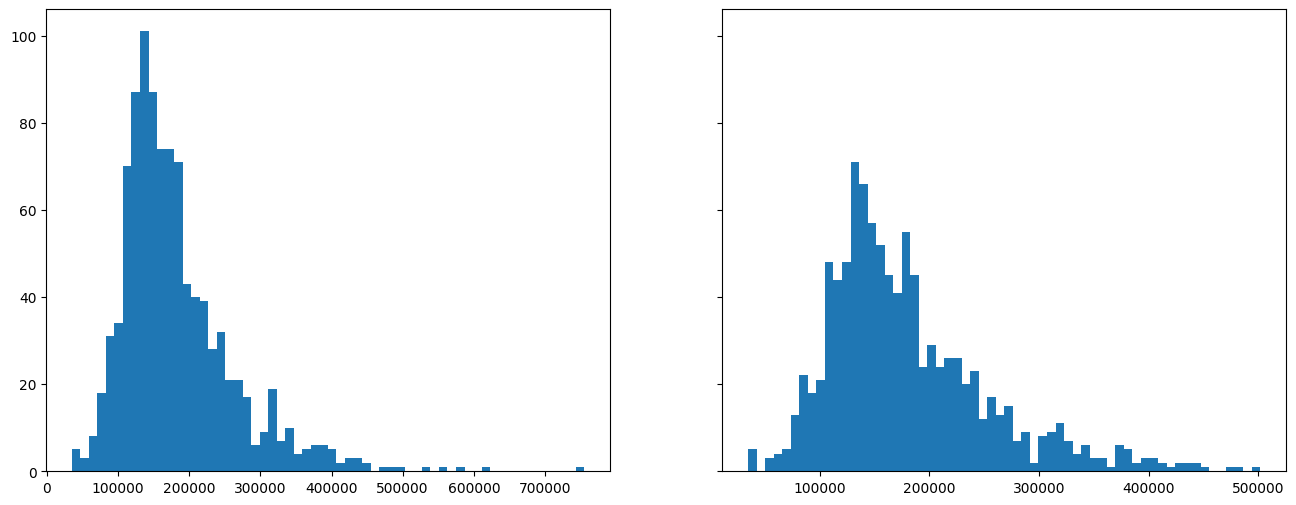

In [9]:
# ["LotFrontage",  - YES log
# "LotArea",  - YES log
# "YearBuilt", - NO
# "YearRemodAdd",  - NO
# "SalePrice"] - YES
name = "SalePrice"

std_n = 4

a000 = df[name]
a001 = res[res["name"] == name]
minstd4 = a001["mean"] - a001["std"] * std_n
minstd4 = minstd4.to_list()[0]
maxstd4 = a001["mean"] + a001["std"] * std_n
maxstd4 = maxstd4.to_list()[0]


a002 = a000[(minstd4 <= a000) & (a000 <= maxstd4)]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
bins = 60
axs[0].hist(a000, bins=bins)
axs[1].hist(a002, bins=bins)
plt.plot()
print(len(a002))

761

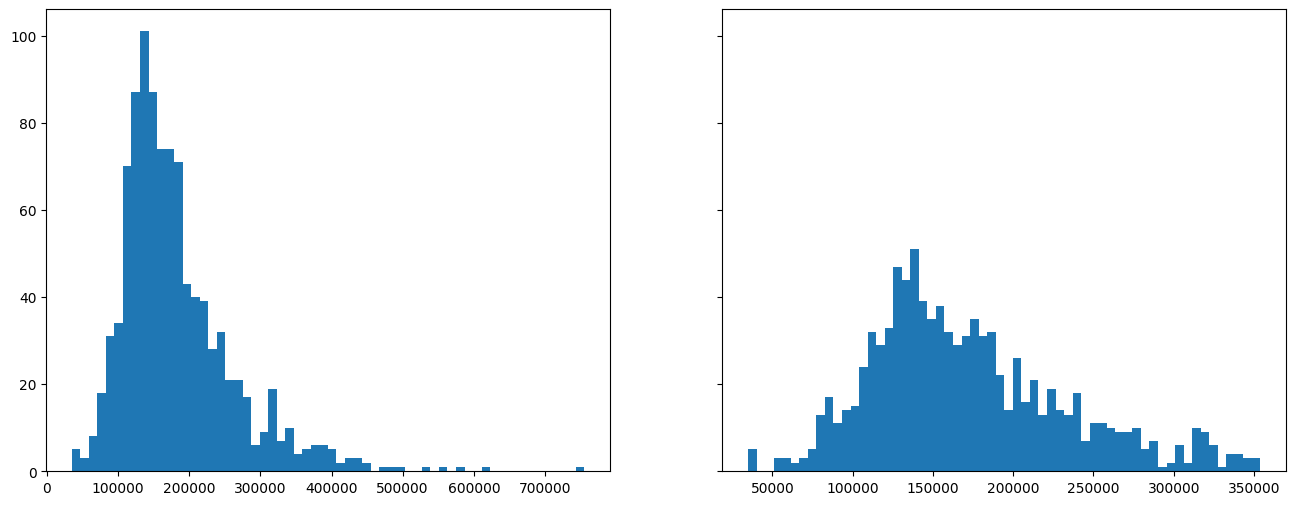

In [40]:
# ["LotFrontage",  - YES log
# "LotArea",  - YES log
# "YearBuilt", - NO
# "YearRemodAdd",  - NO
# "SalePrice"] - YES
name = "SalePrice"
std_n = 3

def reduce(v, bv, std_n, n):
    tmp = v[bv]
    std = tmp.std()
    mean = tmp.mean()
    minstd = mean - std * std_n
    maxstd = mean + std * std_n
    res = (minstd <= v) & (v <= maxstd)
    #print(sum(res))
    if(sum(res) == n): return(res)
    return(reduce(v, res, std_n, sum(res)))

bv = [True] * len(df[name])
res = df[name][reduce(df[name], bv, std_n, len(df[name]))]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
bins = 60
axs[0].hist(df[name], bins=bins)
axs[1].hist(res, bins=bins)
plt.plot()
#print(len(res))


for i in continuous:
    bv = bv & reduce(df[i], bv, std_n, len(df[name]))

sum(bv)

In [7]:
df_2 = df[continuous]

def yyy(col):
    median = col.median()
    std = col.std()

    col = (col - median) / std

    return(col)

df_2 = df_2.apply(yyy, 0)

res = pandas.DataFrame([xxx(df_2[col]) for col in continuous])
print(res)

           name     type  count  missing  cardinality   min    max  mean  \
0   LotFrontage  float64    999     0.17          103 -2.11  10.47 -0.00   
1       LotArea  float64    999     0.00          780 -0.71  18.02  0.11   
2     YearBuilt  float64    999     0.00          107 -3.13   1.20 -0.08   
3  YearRemodAdd  float64    999     0.00           61 -2.16   0.78 -0.43   
4     SalePrice  float64    999     0.00          536 -1.61   7.36  0.23   

   median  std    q1   q2    q3  mode mode f mode % mode2 mode2 f mode2 %  \
0     0.0  1.0 -0.43  0.0  0.43  None   None   None  None    None    None   
1     0.0  1.0 -0.16  0.0  0.19  None   None   None  None    None    None   
2     0.0  1.0 -0.67  0.0  0.87  None   None   None  None    None    None   
3     0.0  1.0 -1.32  0.0  0.49  None   None   None  None    None    None   
4     0.0  1.0 -0.42  0.0  0.64  None   None   None  None    None    None   

  cardinality_  
0          (,)  
1          (,)  
2          (,)  
3          (

**Mean had no correlation with log scale (The problem was that i used apply incorrectly) but min max disbalance after stardatizadion has correlatino**


could Sale price be logarithmic? I am asking this couse of mean of 2.20\
No

But, there are som outliers and prices are split into to sections at [2.0 and 2.3]

-----

When i changed to plots before standardization the plots are mulch clearer now (and indeed the price is logarithmic)

My assumption is that standardization took away lots of numerical precision (And also squeezing data into -1 to 1 makes everything mutch more dense)

----

After checking mean again LotArea  also looks a bit stage (0.10)\
Yes!!!

-----

We can also check it with other variables, but they seem fine\
LotFrontage is also log

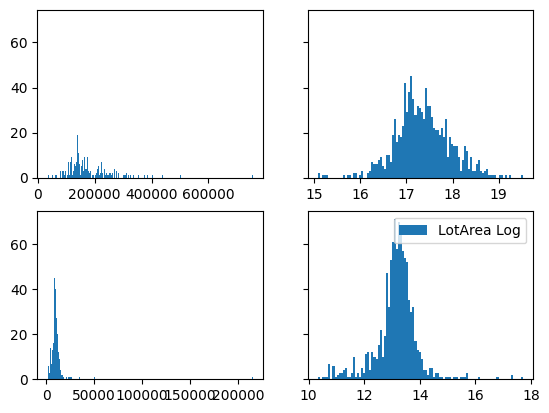

In [8]:
import matplotlib.pyplot as plt
import math

fig, axs = plt.subplots(2, 2, sharey=True)

tmp = df["SalePrice"]
#tmp = tmp[tmp >= 1.75]

axs[0][0].hist(tmp, bins=1000)
axs[0][1].hist([math.log(i, 2) for i in tmp], bins=100)

tmp2 = df["LotArea"]

axs[1][0].hist(tmp2, bins=1000, label = "LotArea")
axs[1][1].hist([math.log(i, 2) for i in tmp2], bins=100, label = "LotArea Log")

plt.plot()
plt.legend()


[]

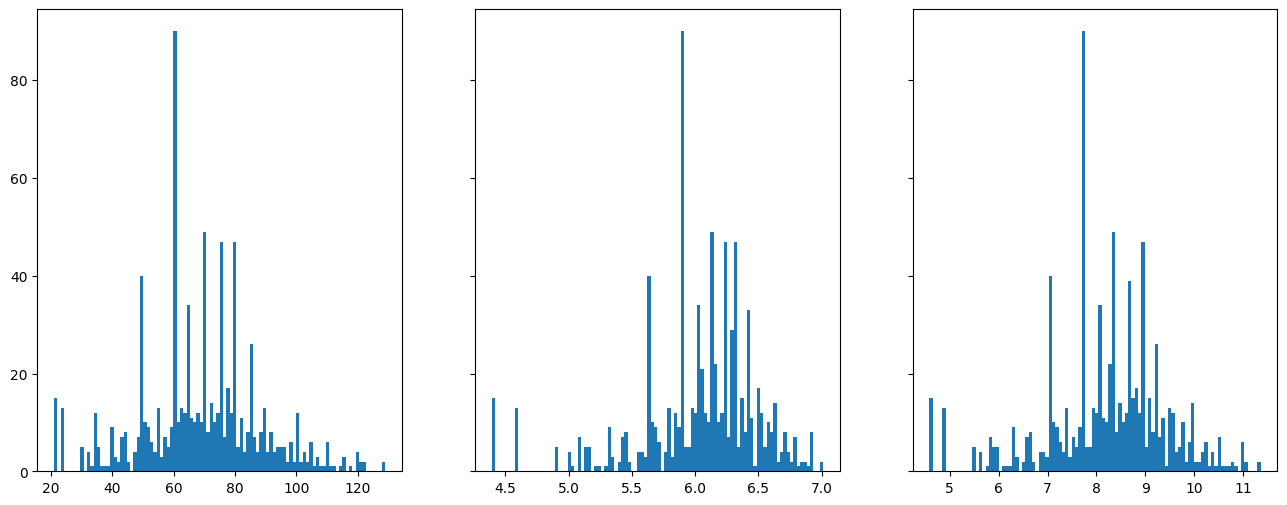

In [34]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# ["LotFrontage",  - YES log
# "LotArea",  - YES log
# "YearBuilt", - NO
# "YearRemodAdd",  - NO
# "SalePrice"] - YES
tmp = df["LotFrontage"]

tmp = tmp[tmp < 130]

bins = 100
axs[0].hist(tmp, bins=bins)
axs[1].hist([math.log(i, 2) for i in tmp], bins=bins)
axs[2].hist([math.sqrt(i) for i in tmp], bins=bins)

plt.plot()

In [270]:
df_3 = df[continuous]

log_cols = ["LotFrontage", "LotArea", "SalePrice"]

def to_standardization(col):
    if numpy.isin(col.name, log_cols):
        col = numpy.log(col)
        #col = numpy.sqrt(col)
    median = col.median()
    std = col.std()
    col = (col - median) / std
    return(col)
df_3 = df_3.apply(to_standardization, 0)

res = pandas.DataFrame([xxx(df_3[col]) for col in continuous])
print(res)

           name     type  count  missing  cardinality   min   max  mean  \
0   LotFrontage  float64    999     0.17          103 -3.47  4.32 -0.16   
1       LotArea  float64    999     0.00          780 -3.81  6.01 -0.07   
2     YearBuilt  float64    999     0.00          107 -3.13  1.20 -0.08   
3  YearRemodAdd  float64    999     0.00           61 -2.16  0.78 -0.43   
4     SalePrice  float64    999     0.00          536 -3.81  3.76  0.05   

   median  std    q1   q2    q3  mode mode f mode % mode2 mode2 f mode2 %  \
0     0.0  1.0 -0.44  0.0  0.38  None   None   None  None    None    None   
1     0.0  1.0 -0.42  0.0  0.40  None   None   None  None    None    None   
2     0.0  1.0 -0.67  0.0  0.87  None   None   None  None    None    None   
3     0.0  1.0 -1.32  0.0  0.49  None   None   None  None    None    None   
4     0.0  1.0 -0.57  0.0  0.67  None   None   None  None    None    None   

  cardinality_  
0          (,)  
1          (,)  
2          (,)  
3          (,)  
4

[]

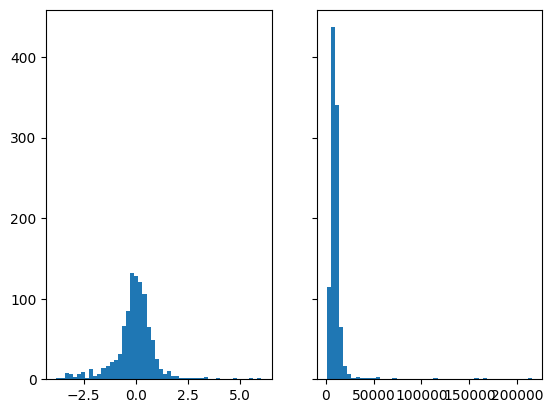

In [271]:
fig, axs = plt.subplots(1, 2, sharey=True)

# ["LotFrontage",  - YES log
# "LotArea",  - YES log
# "YearBuilt", - NO
# "YearRemodAdd",  - NO
# "SalePrice"] - YES
field = "LotArea"

tmp1 = df_3[field]
tmp2 = df[field]
bins = 50
axs[0].hist(tmp1, bins=bins)
axs[1].hist(tmp2, bins=bins)

plt.plot()

In [274]:
print(df_2["LotArea"].sort_values().to_list())

[-0.7139787633602143, -0.6972503600479227, -0.6941849458283929, -0.6880541173893331, -0.6806971232624613, -0.6806971232624613, -0.6806971232624613, -0.6806971232624613, -0.6806971232624613, -0.6806971232624613, -0.6806971232624613, -0.6641438864770001, -0.6623046379452822, -0.6623046379452822, -0.659677140042828, -0.6582758078281857, -0.6570496421403739, -0.6525828957062018, -0.6424232371500456, -0.6424232371500456, -0.6291981643743596, -0.6281471652133779, -0.6281471652133779, -0.6273589158426417, -0.625694833837754, -0.625694833837754, -0.6134331769596345, -0.6088788472620473, -0.6069520154669142, -0.6069520154669142, -0.6050251836717812, -0.6025728522961573, -0.6008211870278545, -0.5961792740668521, -0.5956537744863613, -0.5944276087985494, -0.5749841243203885, -0.5650872155544777, -0.5642113829203264, -0.5587812205885877, -0.5493222281397527, -0.5491470616129224, -0.5491470616129224, -0.5491470616129224, -0.5491470616129224, -0.5491470616129224, -0.5479208959251105, -0.547920895925

AttributeError: 'DataFrame' object has no attribute 'significant'

https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff